<a href="https://colab.research.google.com/github/dewnijayasuriya/DL-LAB05/blob/main/IT22261700Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 - Implement a Simple RNN to Predict the Next Value in a Small Sequence of Numbers**

***Read the following descriptions and instructions***

In time-series analysis, predicting future values based on past observations is a fundamental task. Recurrent Neural Networks (RNNs) are particularly well-suited for this type of problem due to their ability to maintain a memory of previous inputs through their recurrent connections.

In this task, you will work with a synthetic dataset that represents a simple sine wave. The sine wave is a periodic function and serves as a good example to understand how RNNs can capture patterns and make predictions.

A **sine wave** is a fundamental waveform that is widely used in various fields, including signal processing, physics, and time-series analysis. It is characterized by its smooth, periodic oscillations, making it an ideal example for understanding time-series prediction tasks.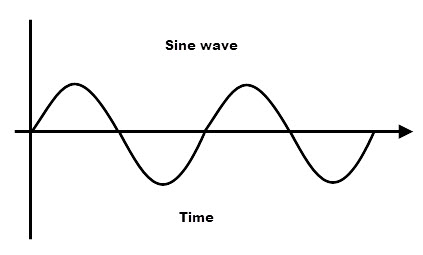

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

The generate_sine_wave function generates a synthetic sine wave dataset, which is often used in time-series prediction tasks, particularly for training models like RNNs and LSTMs.


**seq_length=100**: This parameter is intended to specify the length of the sequence that you want to generate

**num_samples=1000**:This parameter determines the number of data points (samples) to generate for the sine wave.

In [3]:
# 1. Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples) # create an array x of 1000 points between 0 and 50.
    y = np.sin(x) # Applies the sine function to each value in x.
    return y


The create_dataset function prepares the sine wave data for use in an RNN by converting the continuous data into sequences that the RNN can learn from. The time_step parameter in the create_dataset function represents the number of previous time points (or observations) that are used as input to predict the next time point in a sequence.

In [4]:
# 2. Prepare the Dataset for RNN
def create_dataset(data, time_step=10): # number of previous time points
    X, y = [], [] # X → stores input sequences (sliding windows), y → stores the next value (target to predict).
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

To prepare the data for modeling, it is important to normalize it so that all values fall within a specific range, typically between 0 and 1. This step improves the performance and convergence of neural network models.

The MinMaxScaler from sklearn.preprocessing is used for this purpose. It scales the data such that the minimum value of the data becomes 0 and the maximum value becomes 1.

The sine wave data is reshaped into a 2D array (-1, 1) to fit the scaler, as it expects a 2D input. After scaling, the data is reshaped back into its original 1D form.


This step takes the sine wave values (ranging from -1 to 1), rescales them to fall between 0 and 1 using MinMaxScaler, and ensures the data is in the correct shape for the next steps.

In [6]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1)) # Creates a Min-Max scaler that will map values into the range 0 → 1.
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [8]:
# Create the Dataset
time_step = 10  # Time steps for RNN input (use 10 past values of the sine wave to predict the next value.)
X, y = create_dataset(data, time_step) # Calls the function we explained earlier.It slides a window of length 10 across the dataset and builds input-output pairs.

In [9]:
# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1) # reshape the dataset into 3D


This division of data helps in evaluating the model’s performance by training it on a substantial portion of the data and testing its predictions on unseen data.

In [10]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:] # first 80% of sequences for training, last 20% for testing.
y_train, y_test = y[:train_size], y[train_size:]


***Modify the units parameter in the SimpleRNN layer to see how the number of hidden units affects the model's ability to learn the sequence.***


**optimizer='adam':** Uses the Adam optimizer, which is a popular choice for training deep learning models due to its adaptive learning rate.


**loss='mean_squared_error':** Sets the loss function to mean squared error (MSE), which is commonly used for regression tasks to measure the average squared difference between predicted and actual values.

SimpleRNN → a recurrent layer that processes sequences.

units=15 → there are 15 hidden neurons (this can be tuned).

input_shape=(time_step, 1) → each sample has:

time_step = 10 (past values used for prediction)

1 feature per time step (just the sine wave value).

return_sequences=False → only the last output is returned

In [37]:
# 3. Define the RNN Model
model = Sequential() # Creates a sequential model
model.add(SimpleRNN(units=15, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1)) # Dense layer with 1 neuron → final output.
model.compile(optimizer='adam', loss='mean_squared_error')

***Adjust the epochs and batch_size during the training phase to optimize the model's learning process and performance.***

an

**epochs=20:** Specifies the number of times the entire training dataset will pass through the model.


**batch_size=32:** Determines the number of samples per gradient update.

**verbose=1:** Provides detailed output during training, including the progress of each epoch and loss values.

In [39]:
# 4. Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'
# More epochs → more chances to learn patterns, but too many can cause overfitting.
# Smaller batch_size → more updates, noisier but can generalize better.
# Larger batch_size → fewer updates, smoother training but needs more memory.

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1642e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5225e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4377e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7177e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1958e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4514e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0188e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2663e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0643e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7417e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3500e-04
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1458e-04
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4421e-04
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8350e-04
Epoch 15/20
25/25 ━━━━━━━━━━━

In [40]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


These steps reverse the normalization applied earlier to the predictions and actual values. Normalization scales the data to a range, typically [0, 1], which helps with model training but makes the results difficult to interpret directly.
By applying the inverse transformation, you convert the scaled predictions (y_pred) and test values (y_test) back to their original scale, allowing you to evaluate and visualize the model's performance in the context of the original data values.

In [41]:
# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

This plot visually compares the actual sine wave values (y_test) with the values predicted by the RNN model (y_pred).

By plotting both sets of values on the same graph, you can easily see how well the model's predictions align with the actual data.

This visualization helps in assessing the performance of the RNN model and understanding how accurately it captures the underlying pattern in the time series data.

***Analyze the resulting plot. If the predicted values deviate significantly from the actual values, experiment with different model configurations and training parameters to improve accuracy.***
  
# **Describe your observations. You can add a text cell and type your observations.**

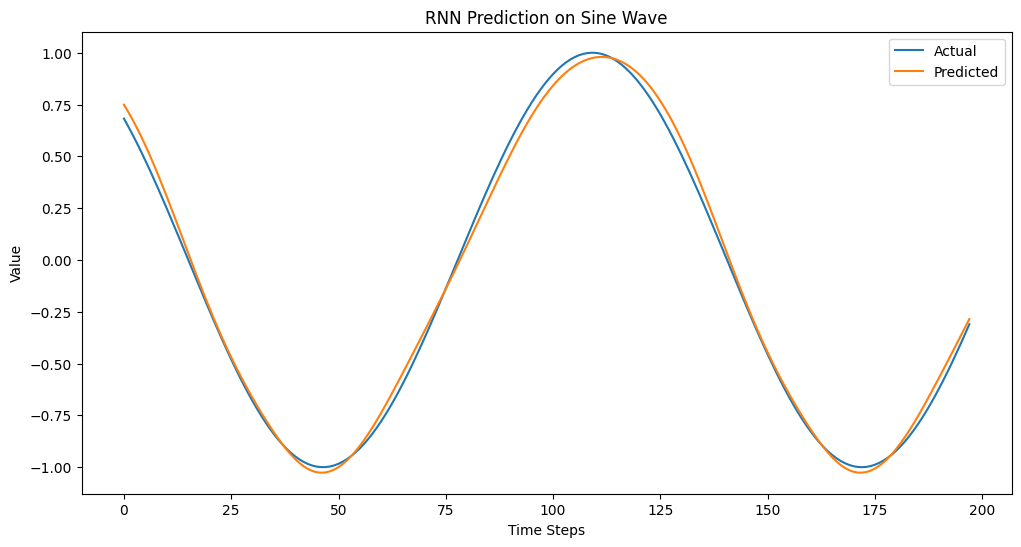

In [42]:

# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()

Observations:

Predicted vs Actual:

* The orange line (Predicted) closely follows the blue line (Actual).
* This indicates the RNN has learned the sine wave pattern well.


Accuracy:

* There are slight deviations at the peaks and troughs, where the prediction lags or is slightly below/above the actual values.
* Overall, the error is small, showing the model predicts the general shape and amplitude effectively.
